<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/RanForReg_SocMedAdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Step 1: Download dataset
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
print("Path to dataset files:", path)

# Load dataset
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)

# Display basic info
print(df.head())
print(df.info())
print(df['Mental_Health_Score'].describe())

Path to dataset files: /kaggle/input/social-media-addiction-vs-relationships
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes             

In [3]:
# Step 2: Define target and features
target = 'Mental_Health_Score'
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

In [4]:
# Step 3: Create preprocessing and model pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [5]:
# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Fit model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Student_ID', 'Age',
                                                   'Avg_Daily_Usage_Hours',
                                                   'Sleep_Hours_Per_Night',
                                                   'Conflicts_Over_Social_Media',
                                                   'Addicted_Score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Academic_Level',
                                                   'Country',
                                                   'Most_Used_Platform',
                                                   'Affects_Academic_Performance',
                                                   'Relationship_Status'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [8]:
# Step 6: Predict and evaluate
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # More compatible
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.050780141843971616
Root Mean Squared Error (RMSE): 0.2009022203154051
R² Score: 0.9663804675716441


In [9]:
# Step 7: Feature importance
rf_model = pipeline.named_steps['regressor']
onehot = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_cols = onehot.get_feature_names_out(categorical_cols)
all_features = numeric_cols + list(encoded_cat_cols)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

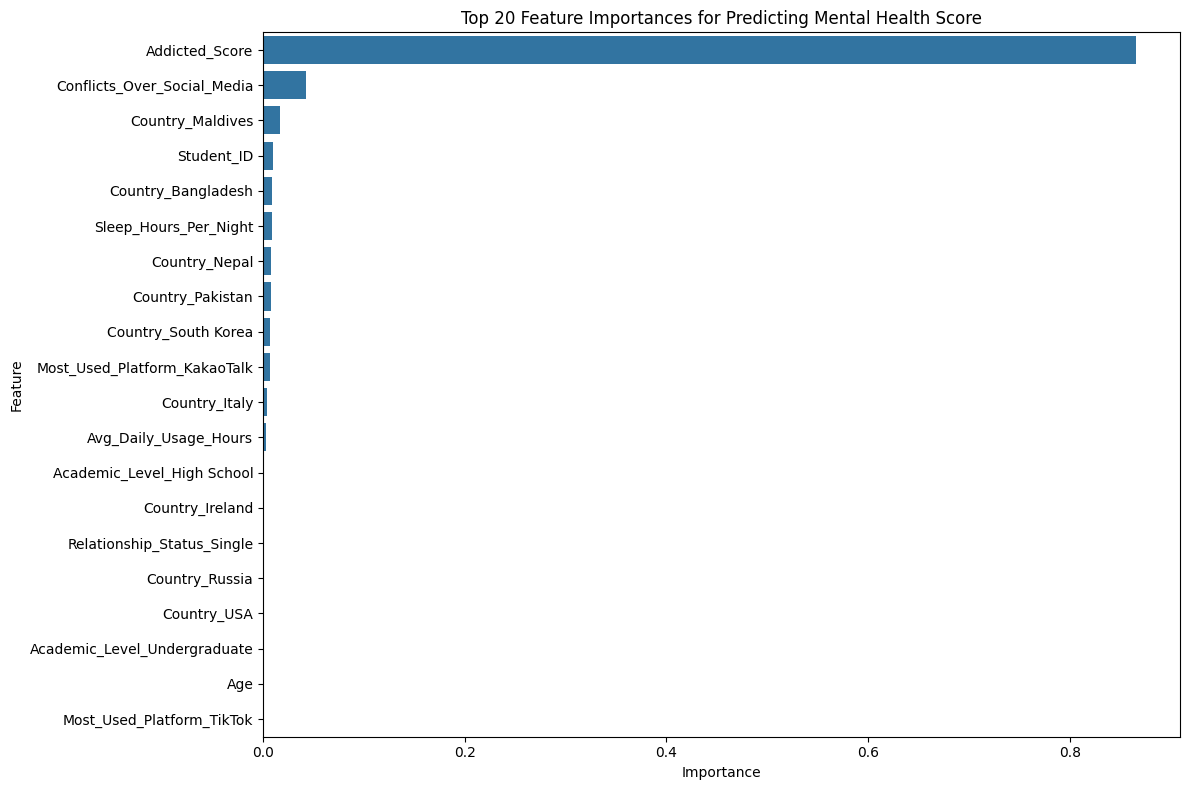

In [10]:
# Step 8: Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances for Predicting Mental Health Score')
plt.tight_layout()
plt.show()

In [11]:
# --- STEP 9: Prepare for Addicted_Score prediction ---
target_2 = 'Addicted_Score'
df_addiction = df.drop(columns=['Mental_Health_Score'])  # remove Mental_Health_Score
X2 = df_addiction.drop(columns=[target_2])
y2 = df_addiction[target_2]

categorical_cols2 = X2.select_dtypes(include=['object']).columns.tolist()
numeric_cols2 = X2.select_dtypes(include=np.number).columns.tolist()

In [12]:
# --- STEP 10: Build new pipeline ---
preprocessor2 = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols2),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols2)
])

pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

pipeline2.fit(X2_train, y2_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Student_ID', 'Age',
                                                   'Avg_Daily_Usage_Hours',
                                                   'Sleep_Hours_Per_Night',
                                                   'Conflicts_Over_Social_Media']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Academic_Level',
                                                   'Country',
                                                   'Most_Used_Platform',
                                                   'Affects_Academic_Performance',
                                                   'Relationship_Status'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [13]:
# --- STEP 11: Evaluate Addicted_Score prediction ---
y2_pred = pipeline2.predict(X2_test)
mae2 = mean_absolute_error(y2_test, y2_pred)
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2_2 = r2_score(y2_test, y2_pred)

print("\n📊 Addicted_Score Prediction Metrics:")
print("Mean Absolute Error (MAE):", mae2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("R² Score:", r2_2)


📊 Addicted_Score Prediction Metrics:
Mean Absolute Error (MAE): 0.0838297872340425
Root Mean Squared Error (RMSE): 0.2091760261814867
R² Score: 0.9825141633834527


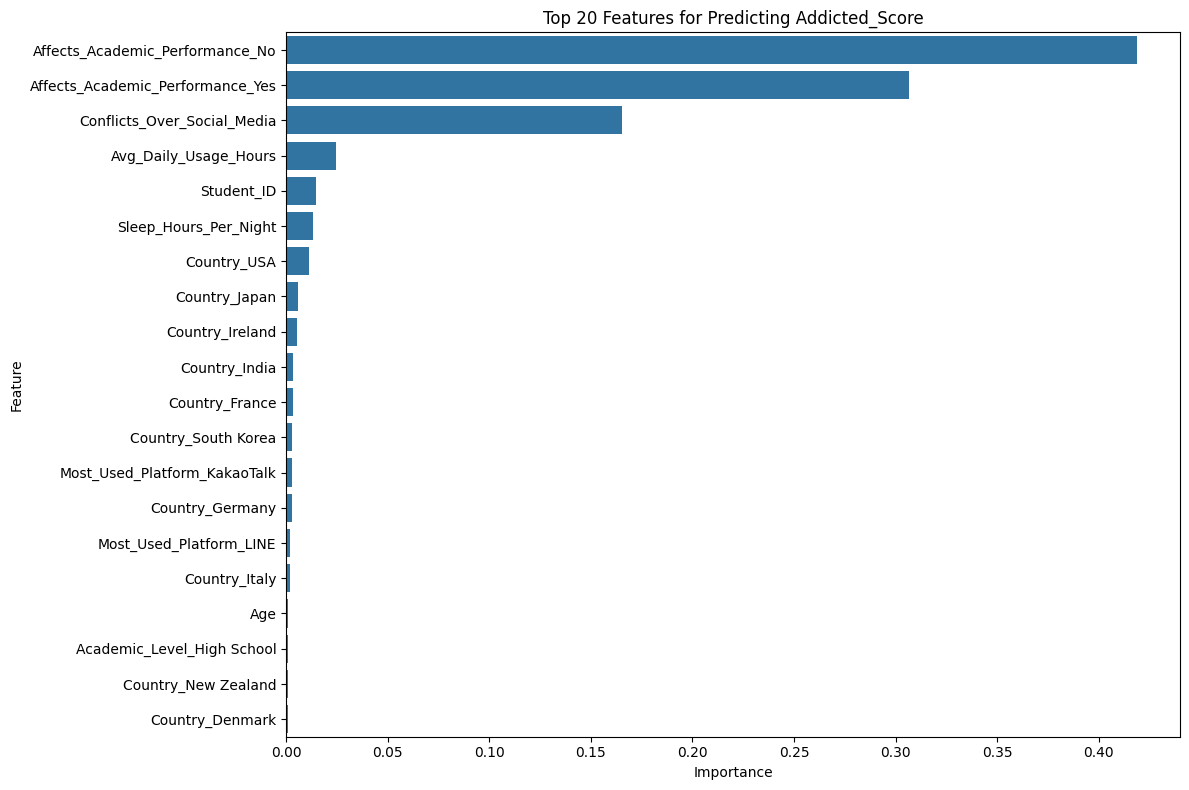

In [14]:
# --- STEP 12: Feature Importance for Addicted_Score ---
rf_model2 = pipeline2.named_steps['regressor']
onehot2 = pipeline2.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_cols2 = onehot2.get_feature_names_out(categorical_cols2)
all_features2 = numeric_cols2 + list(encoded_cat_cols2)

importances2 = rf_model2.feature_importances_
feature_importance_df2 = pd.DataFrame({
    'Feature': all_features2,
    'Importance': importances2
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df2.head(20))
plt.title('Top 20 Features for Predicting Addicted_Score')
plt.tight_layout()
plt.show()
